<a href="https://colab.research.google.com/github/bibikashrt/DS-A/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# ARMA
# ACF measures the correlation between a time series and its past values (lags).
# PACF measures the correlation between the time series and its lag after removing the effect of intermediate lags.

In [3]:
np.random.seed(42)

# ARMA(2,1): AR = [1, -0.5, 0.25], MA = [1, 0.4]
ar = np.array([1, -0.5, 0.25])
ma = np.array([1, 0.4])
arma_process = ArmaProcess(ar, ma)
arma_data = arma_process.generate_sample(nsample=500)

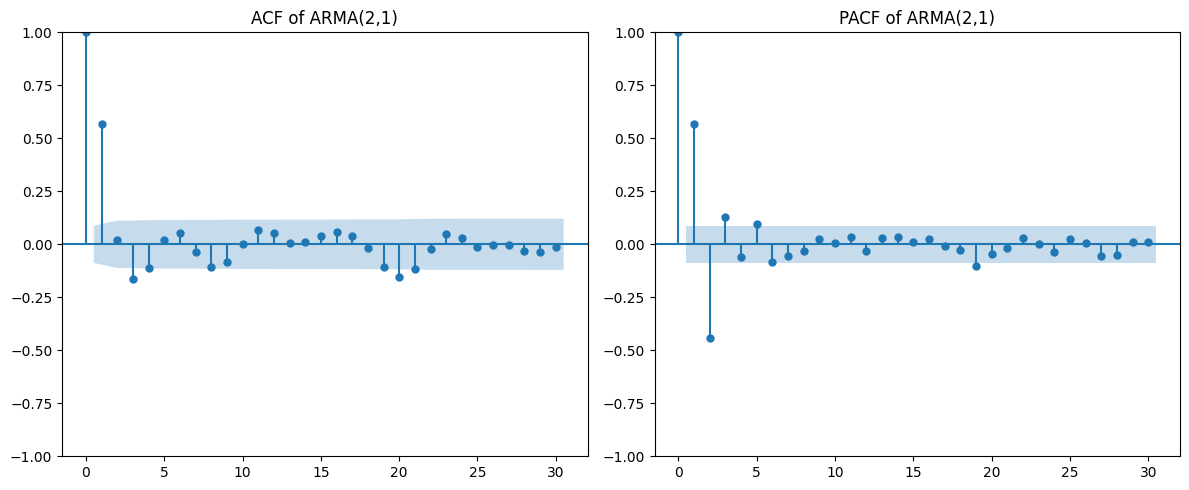

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plot_acf(arma_data, lags=30, ax=plt.gca())
plt.title('ACF of ARMA(2,1)')

plt.subplot(1,2,2)
plot_pacf(arma_data, lags=30, ax=plt.gca(), method='ywm')
plt.title('PACF of ARMA(2,1)')

plt.tight_layout()
plt.show()

In [5]:
# ARIMA

In [8]:
np.random.seed(42)

#Simulate ARIMA(1,1,1)
model = ARIMA(np.random.normal(size=500), order=(1,1,1))
arima_data = model.fit().simulate(nsimulations=500)

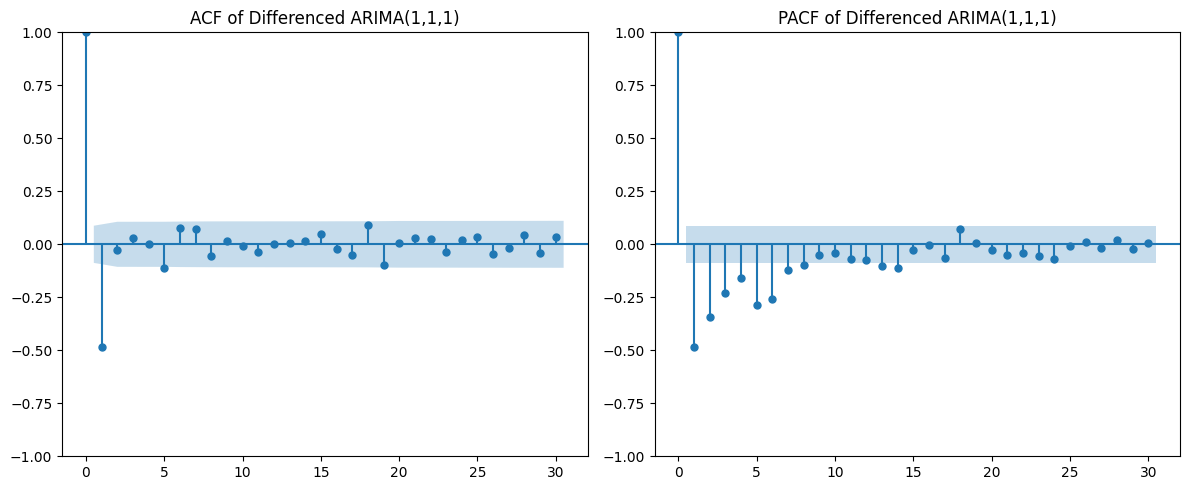

In [10]:
# First difference (because d = 1)
diff_data = pd.Series(arima_data).diff().dropna()

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plot_acf(diff_data, lags=30, ax=plt.gca())
plt.title('ACF of Differenced ARIMA(1,1,1)')

plt.subplot(1,2,2)
plot_pacf(diff_data, lags=30, ax=plt.gca(), method='ywm')
plt.title('PACF of Differenced ARIMA(1,1,1)')

plt.tight_layout()
plt.show()


In [11]:
from statsmodels.datasets import sunspots

data = sunspots.load_pandas().data['SUNACTIVITY']

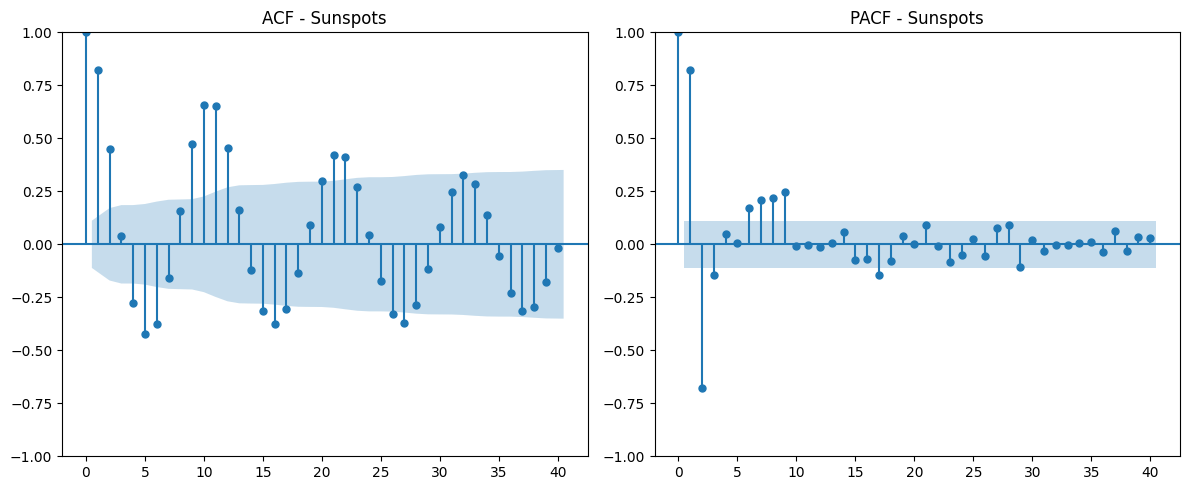

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plot_acf(data, lags=40, ax=plt.gca())
plt.title('ACF - Sunspots')

plt.subplot(1,2,2)
plot_pacf(data, lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF - Sunspots')

plt.tight_layout()
plt.show()